In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from numpy import array as npa




In [3]:
def dx(x, y, dt):
    return dt*(x - y - x*(x**2 + y**2))
    
    
def dy(x, y, dt):  
    return dt*(x + y - y*(x**2 + y**2))

<IPython.core.display.Javascript object>


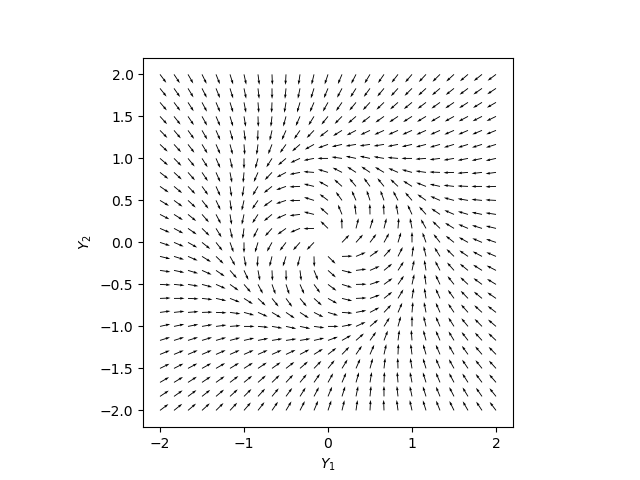

In [130]:
n = 25
dt = 0.01
X, Y = np.meshgrid(np.linspace(-2, 2, n), np.linspace(-2, 2, n))
U = dx(X, Y, dt)
V = dy(X, Y, dt)


k = np.sqrt(U**2 + V**2) 
U = U / k
V = V / k


# V = V * (1/np.abs(U))
# U = np.ones(U.shape)

# V = np.tan(np.arctan2(U, V))
# U = np.ones(U.shape)


# amp = np.max(U)/U
# U = U * amp
# V = V * amp
plt.figure()
plt.quiver(X, Y, U, V, angles='xy', units='xy', pivot='tail',scale=8)
plt.gca().set_aspect("equal")
plt.xlabel(r'$Y_1$')
plt.ylabel(r'$Y_2$')
plt.savefig("LimitCycleFieldForce.svg")


<IPython.core.display.Javascript object>


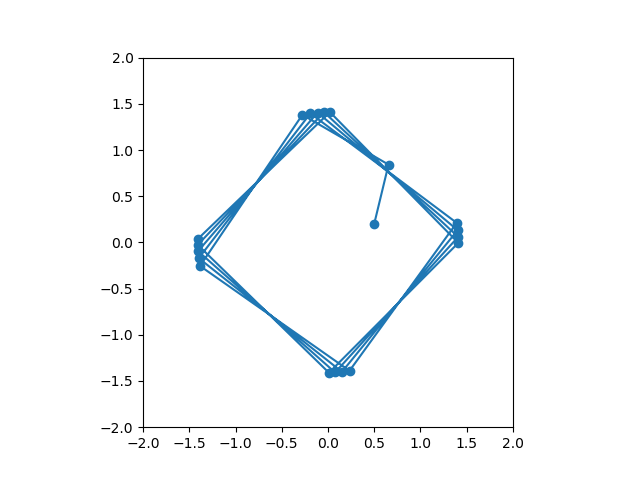

In [45]:
xy = npa([0.5, 0.2])[None]
dt = 1
for i in range(1, 20):
    x = xy[-1, 0] + dx(xy[-1, 0], xy[-1, 1], dt)
    y = xy[-1, 1] + dy(xy[-1, 0], xy[-1, 1], dt)
    noise = np.random.randn(2) * dt * 0
#     noise = np.random.uniform(-1, 1, 2) * dt * 10
    xy = np.vstack([xy, [x, y]+ noise])
    
plt.figure()
plt.plot(xy[:, 0], xy[:, 1], 'o-')
# plt.axis('equal')
# plt.axis([-2, 2, -2, 2])

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()
plt.gca().set_aspect("equal")


<IPython.core.display.Javascript object>


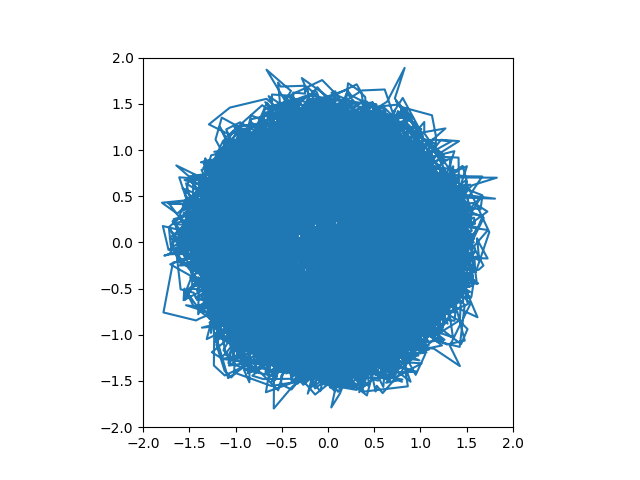

In [48]:
# xy = npa([1.5, 1.5])[None]
xy = npa([0.5, 0.2])[None]
dt = 0.05
for i in range(1, 20000):
    x = xy[-1, 0] + dx(xy[-1, 0], xy[-1, 1], dt)
    y = xy[-1, 1] + dy(xy[-1, 0], xy[-1, 1], dt)
    noise = np.random.randn(2) * dt * 3
#     noise = np.random.uniform(-1, 1, 2) * dt * 10
    xy = np.vstack([xy, [x, y]+ noise])
    
plt.figure()
plt.plot(xy[:, 0], xy[:, 1])
# plt.axis('equal')
# plt.axis([-2, 2, -2, 2])

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()
plt.gca().set_aspect("equal")
#     plt.axis('equal')
    

# xy

In [28]:
# import pandas as pd
# pd.Series.rolling_mean()
xy[0::4].shape

(5000, 2)

In [49]:
import NTIC
import dit

cgState = np.digitize(xy, np.linspace(-2, 2, 3), right=False)
d = NTIC.RandomVariableSet()
d.CreateDistFromTimeSeries(cgState)
d.setYtEt(Yt=list(range(cgState.shape[1])))
d.print()
dit.shannon.mutual_information(d.dd, d.Yt_, d.Yt)

Class:          Distribution
Alphabet:       (1, 2) for all rvs
Base:           linear
Outcome Class:  tuple
Outcome Length: 4
RV Names:       (0, 1, 2, 3)

x              p(x)
(1, 1, 1, 1)   0.22916145807290364
(1, 1, 1, 2)   0.008150407520376018
(1, 1, 2, 1)   0.01730086504325216
(1, 1, 2, 2)   0.0003000150007500375
(1, 2, 1, 1)   0.01615080754037702
(1, 2, 1, 2)   0.22411120556027803
(1, 2, 2, 1)   0.00040002000100005
(1, 2, 2, 2)   0.006950347517375869
(2, 1, 1, 1)   0.009350467523376168
(2, 1, 1, 2)   0.0003000150007500375
(2, 1, 2, 1)   0.22526126306315317
(2, 1, 2, 2)   0.015100755037751887
(2, 2, 1, 1)   0.00025001250062503126
(2, 2, 1, 2)   0.015050752537626881
(2, 2, 2, 1)   0.007100355017750888
(2, 2, 2, 2)   0.22506125306265312

--- attributes ---
{'Et': [],
 'Et_': [],
 'Yt': [0, 1],
 'Yt_': [2, 3],
 'dd': <dit.npdist.Distribution object at 0x000002B136B80E48>,
 'iRV_next': [2, 3],
 'iRV_now': [0, 1],
 'nRV': 2}


1.4460148227482188

In [118]:
import NTIC
import dit


downsample = range(1, 64, 2)
nBin = range(2, 128, 4)

I = np.empty((len(downsample), len(nBin)))

ids = 0
iBin = 0
for ids, ds in enumerate(downsample):
    xyResample = xy[0::ds]
    for iBin, bin in enumerate(nBin):
        if np.mod(ids+iBin, 10) == 1:
            print('t={}; s={}'.format(ds, bin))
        cgState = np.digitize(xyResample, np.linspace(-2, 2, bin), right=False)
        d = NTIC.RandomVariableSet()
        d.CreateDistFromTimeSeries(cgState)
        d.setYtEt(Yt=list(range(cgState.shape[1])))
        # d.print()
        I[ids, iBin] = dit.shannon.mutual_information(d.dd, d.Yt_, d.Yt)
#         if np.mod(ids+iBin, 10) == 1:
#             print('t={}; s={}'.format(ids, iBin))
    
print('done')

t=1; s=2
t=1; s=6
t=1; s=10
t=1; s=14
t=1; s=18
t=1; s=22
t=1; s=26
t=1; s=30
t=1; s=34
t=1; s=38
t=1; s=42
t=1; s=46
t=1; s=50
t=1; s=54
t=1; s=58
t=1; s=62
t=1; s=66
t=1; s=70
t=1; s=74
t=1; s=78
t=1; s=82
t=1; s=86
t=1; s=90
t=1; s=94
t=1; s=98
t=1; s=102
t=1; s=106
t=1; s=110
t=1; s=114
t=1; s=118
t=1; s=122
t=1; s=126
t=3; s=2
t=3; s=6
t=3; s=10
t=3; s=14
t=3; s=18
t=3; s=22
t=3; s=26
t=3; s=30
t=3; s=34
t=3; s=38
t=3; s=42
t=3; s=46
t=3; s=50
t=3; s=54
t=3; s=58
t=3; s=62
t=3; s=66
t=3; s=70
t=3; s=74
t=3; s=78
t=3; s=82
t=3; s=86
t=3; s=90
t=3; s=94
t=3; s=98
t=3; s=102
t=3; s=106
t=3; s=110
t=3; s=114
t=3; s=118
t=3; s=122
t=3; s=126
t=5; s=2
t=5; s=6
t=5; s=10
t=5; s=14
t=5; s=18
t=5; s=22
t=5; s=26
t=5; s=30
t=5; s=34
t=5; s=38
t=5; s=42
t=5; s=46
t=5; s=50
t=5; s=54
t=5; s=58
t=5; s=62
t=5; s=66
t=5; s=70
t=5; s=74
t=5; s=78
t=5; s=82
t=5; s=86
t=5; s=90
t=5; s=94
t=5; s=98
t=5; s=102
t=5; s=106
t=5; s=110
t=5; s=114
t=5; s=118
t=5; s=122
t=5; s=126
t=7; s=2
t=7; s=6
t=7; s=

t=47; s=62
t=47; s=66
t=47; s=70
t=47; s=74
t=47; s=78
t=47; s=82
t=47; s=86
t=47; s=90
t=47; s=94
t=47; s=98
t=47; s=102
t=47; s=106
t=47; s=110
t=47; s=114
t=47; s=118
t=47; s=122
t=47; s=126
t=49; s=2
t=49; s=6
t=49; s=10
t=49; s=14
t=49; s=18
t=49; s=22
t=49; s=26
t=49; s=30
t=49; s=34
t=49; s=38
t=49; s=42
t=49; s=46
t=49; s=50
t=49; s=54
t=49; s=58
t=49; s=62
t=49; s=66
t=49; s=70
t=49; s=74
t=49; s=78
t=49; s=82
t=49; s=86
t=49; s=90
t=49; s=94
t=49; s=98
t=49; s=102
t=49; s=106
t=49; s=110
t=49; s=114
t=49; s=118
t=49; s=122
t=49; s=126
t=51; s=2
t=51; s=6
t=51; s=10
t=51; s=14
t=51; s=18
t=51; s=22
t=51; s=26
t=51; s=30
t=51; s=34
t=51; s=38
t=51; s=42
t=51; s=46
t=51; s=50
t=51; s=54
t=51; s=58
t=51; s=62
t=51; s=66
t=51; s=70
t=51; s=74
t=51; s=78
t=51; s=82
t=51; s=86
t=51; s=90
t=51; s=94
t=51; s=98
t=51; s=102
t=51; s=106
t=51; s=110
t=51; s=114
t=51; s=118
t=51; s=122
t=51; s=126
t=53; s=2
t=53; s=6
t=53; s=10
t=53; s=14
t=53; s=18
t=53; s=22
t=53; s=26
t=53; s=30
t=53; 

<IPython.core.display.Javascript object>


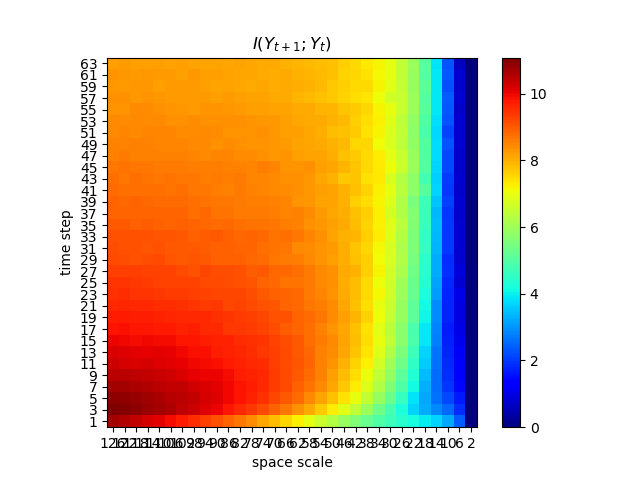

In [125]:
plt.figure()
plt.imshow(I, cmap='jet', interpolation='nearest')
plt.colorbar()
plt.xlabel('space scale')
plt.ylabel('time step')
plt.xticks(range(len(nBin)), npa(nBin))
plt.yticks(range(len(downsample)), downsample)
plt.title(r'$I(Y_{t+1}; Y_t)$')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


<IPython.core.display.Javascript object>


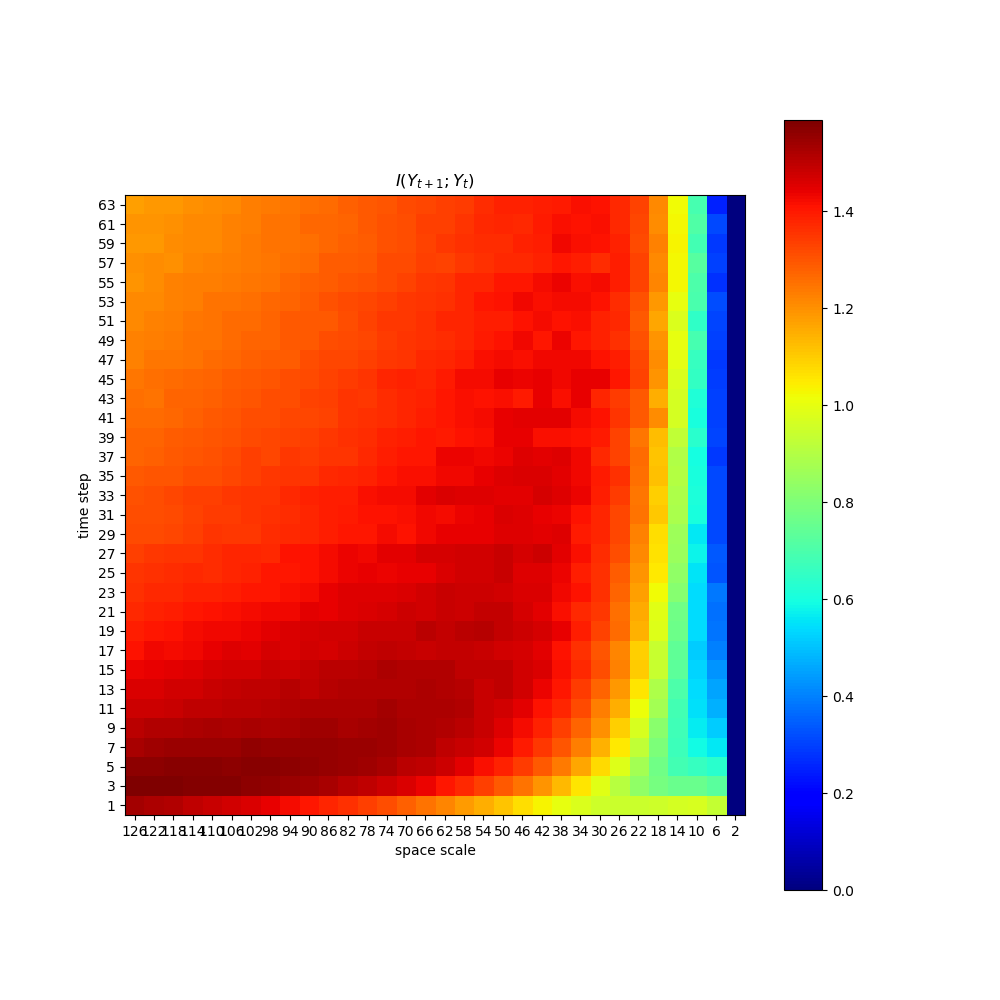

In [131]:
plt.figure(figsize=(10, 10))
plt.imshow(I / np.log2(npa(nBin)[None]), cmap='jet', interpolation='nearest')
plt.colorbar()
plt.xlabel('space scale')
plt.ylabel('time step')
plt.xticks(range(len(nBin)), npa(nBin))
plt.yticks(range(len(downsample)), downsample)
plt.title(r'$I(Y_{t+1}; Y_t)$')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.savefig("LimitCycleHeatmap.svg")

